# SARS-CoV-19 Corona Virus Data

Working with some datasets from Kaggle on CoCalc

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

Download `covid_19_data.csv`

Better: adjust all below to work with https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
sbn.set('notebook')

In [2]:
covid = pd.read_csv("covid_19_data.csv", parse_dates=[1, 4]).rename(
    columns={
        'Province/State': 'state',
        'Country/Region': 'country',
        'Last Update': 'lastupdate',
        'ObservationDate': 'time'
    })
covid.tail()

SNo       time                                 state    country  \
4242  4243 2020-03-08                    Northern Territory  Australia   
4243  4244 2020-03-08  Lackland, TX (From Diamond Princess)         US   
4244  4245 2020-03-08                 Montgomery County, TX         US   
4245  4246 2020-03-08     Omaha, NE (From Diamond Princess)         US   
4246  4247 2020-03-08    Travis, CA (From Diamond Princess)         US   

              lastupdate  Confirmed  Deaths  Recovered  
4242 2020-03-06 04:33:03        0.0     0.0        0.0  
4243 2020-02-24 23:33:02        0.0     0.0        0.0  
4244 2020-03-07 19:53:02        0.0     0.0        0.0  
4245 2020-02-24 23:33:02        0.0     0.0        0.0  
4246 2020-02-24 23:33:02        0.0     0.0        0.0

In [3]:
covid['state'] = covid['state'].astype('category')
covid['country'] = covid['country'].astype('category')

In [4]:
covid.dtypes

SNo                    int64
time          datetime64[ns]
state               category
country             category
lastupdate    datetime64[ns]
Confirmed            float64
Deaths               float64
Recovered            float64
dtype: object

## "sick" are those, who are neither dead nor are recovered

In [5]:
covid['sick'] = covid.Confirmed - covid.Recovered - covid.Deaths

### "deathrate" based on confirmed cases

In [6]:
covid['deathrate'] = 100 * covid.Deaths / covid.Confirmed
covid['recrate'] = 100 * covid.Recovered / covid.Confirmed

### filter latest data only!

In [7]:
# but keep the full data around …
covid_all = covid.copy()

In [8]:
covid = covid[covid.time == covid.time.max()].reindex()
covid

SNo       time                                 state         country  \
3992  3993 2020-03-08                                 Hubei  Mainland China   
3993  3994 2020-03-08                                   NaN           Italy   
3994  3995 2020-03-08                                   NaN     South Korea   
3995  3996 2020-03-08                                   NaN            Iran   
3996  3997 2020-03-08                             Guangdong  Mainland China   
...    ...        ...                                   ...             ...   
4242  4243 2020-03-08                    Northern Territory       Australia   
4243  4244 2020-03-08  Lackland, TX (From Diamond Princess)              US   
4244  4245 2020-03-08                 Montgomery County, TX              US   
4245  4246 2020-03-08     Omaha, NE (From Diamond Princess)              US   
4246  4247 2020-03-08    Travis, CA (From Diamond Princess)              US   

              lastupdate  Confirmed  Deaths  Recovered     sick  deathrate  \
3992 2020-03-08 14:43:03    67707.0  2986.0    45235.0  19486.0   4.410179   
3993 2020-03-08 18:03:04     7375.0   366.0      622.0   6387.0   4.962712   
3994 2020-03-08 12:53:03     7314.0    50.0      118.0   7146.0   0.683620   
3995 2020-03-08 11:03:30     6566.0   194.0     2134.0   4238.0   2.954615   
3996 2020-03-08 14:43:03     1352.0     7.0     1256.0     89.0   0.517751   
...                  ...        ...     ...        ...      ...        ...   
4242 2020-03-06 04:33:03        0.0     0.0        0.0      0.0        NaN   
4243 2020-02-24 23:33:02        0.0     0.0        0.0      0.0        NaN   
4244 2020-03-07 19:53:02        0.0     0.0        0.0      0.0        NaN   
4245 2020-02-24 23:33:02        0.0     0.0        0.0      0.0        NaN   
4246 2020-02-24 23:33:02        0.0     0.0        0.0      0.0        NaN   

        recrate  
3992  66.809931  
3993   8.433898  
3994   1.613344  
3995  32.500761  
3996  92.899408  
...         ...  
4242        NaN  
4243        NaN  
4244        NaN  
4245        NaN  
4246        NaN  

[255 rows x 11 columns]

In [9]:
covid.describe()

SNo    Confirmed       Deaths     Recovered          sick  \
count   255.000000    255.00000   255.000000    255.000000    255.000000   
mean   4120.000000    430.72549    14.913725    238.019608    177.792157   
std      73.756356   4302.71234   188.609605   2838.177099   1382.094730   
min    3993.000000      0.00000     0.000000      0.000000      0.000000   
25%    4056.500000      1.00000     0.000000      0.000000      1.000000   
50%    4120.000000      4.00000     0.000000      0.000000      3.000000   
75%    4183.500000     35.50000     0.000000      1.000000     16.500000   
max    4247.000000  67707.00000  2986.000000  45235.000000  19486.000000   

        deathrate     recrate  
count  249.000000  249.000000  
mean     1.320539   16.819022  
std      7.645967   33.098950  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000   10.000000  
max    100.000000  100.000000

death rate stats, where at least a significant amount of patients are known …

In [10]:
min_deaths = covid[covid.Deaths > 2].Deaths.quantile(.1)
min_deaths

3.0

In [11]:
deathrate_sign = covid[covid.Deaths > min_deaths].deathrate
deathrate_sign.describe()

count    20.000000
mean      3.243667
std       4.624665
min       0.392927
25%       0.844441
50%       1.799359
75%       3.108818
max      20.481928
Name: deathrate, dtype: float64

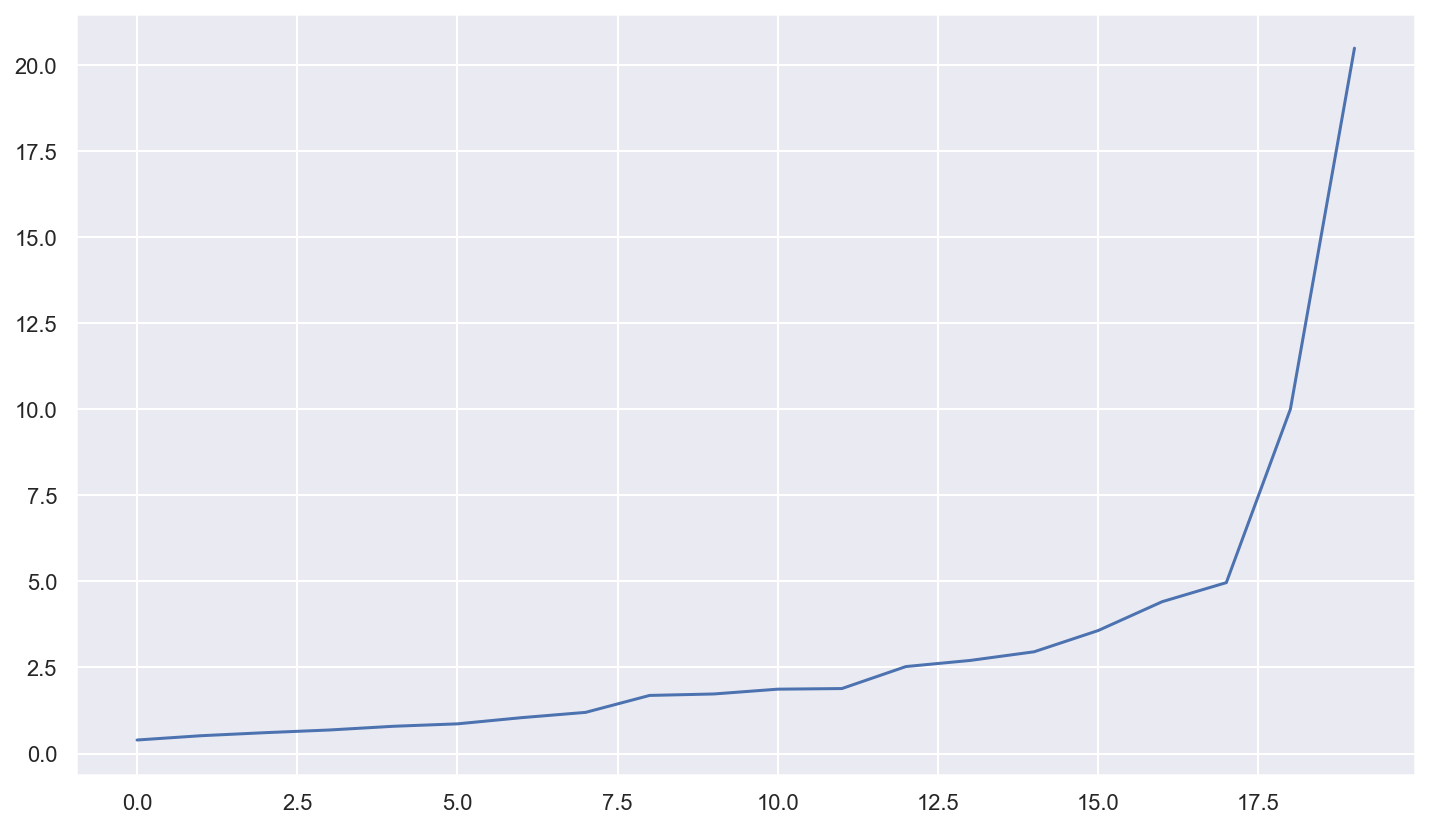

In [12]:
plt.plot(np.sort(deathrate_sign.to_numpy()))

In [13]:
covid.sort_values(by='Deaths', ascending=False).head(20)

SNo       time                         state         country  \
3992  3993 2020-03-08                         Hubei  Mainland China   
3993  3994 2020-03-08                           NaN           Italy   
3995  3996 2020-03-08                           NaN            Iran   
3994  3995 2020-03-08                           NaN     South Korea   
3997  3998 2020-03-08                         Henan  Mainland China   
3999  4000 2020-03-08                           NaN          France   
4037  4038 2020-03-08               King County, WA              US   
4006  4007 2020-03-08                           NaN           Spain   
4011  4012 2020-03-08                  Heilongjiang  Mainland China   
4012  4013 2020-03-08                       Beijing  Mainland China   
3996  3997 2020-03-08                     Guangdong  Mainland China   
4008  4009 2020-03-08                     Chongqing  Mainland China   
4015  4016 2020-03-08                         Hebei  Mainland China   
4025  4026 2020-03-08                        Hainan  Mainland China   
4010  4011 2020-03-08                           NaN           Japan   
4004  4005 2020-03-08                      Shandong  Mainland China   
4005  4006 2020-03-08  Diamond Princess cruise ship          Others   
4044  4045 2020-03-08                           NaN            Iraq   
4002  4003 2020-03-08                         Anhui  Mainland China   
4001  4002 2020-03-08                         Hunan  Mainland China   

              lastupdate  Confirmed  Deaths  Recovered     sick  deathrate  \
3992 2020-03-08 14:43:03    67707.0  2986.0    45235.0  19486.0   4.410179   
3993 2020-03-08 18:03:04     7375.0   366.0      622.0   6387.0   4.962712   
3995 2020-03-08 11:03:30     6566.0   194.0     2134.0   4238.0   2.954615   
3994 2020-03-08 12:53:03     7314.0    50.0      118.0   7146.0   0.683620   
3997 2020-03-08 05:03:02     1272.0    22.0     1247.0      3.0   1.729560   
3999 2020-03-08 18:03:04     1126.0    19.0       12.0   1095.0   1.687389   
4037 2020-03-08 20:23:09       83.0    17.0        1.0     65.0  20.481928   
4006 2020-03-08 20:33:02      673.0    17.0       30.0    626.0   2.526003   
4011 2020-03-08 14:43:03      481.0    13.0      412.0     56.0   2.702703   
4012 2020-03-08 01:23:07      428.0     8.0      308.0    112.0   1.869159   
3996 2020-03-08 14:43:03     1352.0     7.0     1256.0     89.0   0.517751   
4008 2020-03-08 23:23:03      576.0     6.0      527.0     43.0   1.041667   
4015 2020-03-07 13:03:05      318.0     6.0      307.0      5.0   1.886792   
4025 2020-03-08 04:33:02      168.0     6.0      159.0      3.0   3.571429   
4010 2020-03-08 14:53:11      502.0     6.0       76.0    420.0   1.195219   
4004 2020-03-08 10:03:11      758.0     6.0      642.0    110.0   0.791557   
4005 2020-03-06 01:29:39      696.0     6.0       40.0    650.0   0.862069   
4044 2020-03-08 21:03:03       60.0     6.0        0.0     54.0  10.000000   
4002 2020-03-08 05:13:06      990.0     6.0      984.0      0.0   0.606061   
4001 2020-03-08 12:53:03     1018.0     4.0      968.0     46.0   0.392927   

        recrate  
3992  66.809931  
3993   8.433898  
3995  32.500761  
3994   1.613344  
3997  98.034591  
3999   1.065719  
4037   1.204819  
4006   4.457652  
4011  85.654886  
4012  71.962617  
3996  92.899408  
4008  91.493056  
4015  96.540881  
4025  94.642857  
4010  15.139442  
4004  84.696570  
4005   5.747126  
4044   0.000000  
4002  99.393939  
4001  95.088409

## Situation in Italy

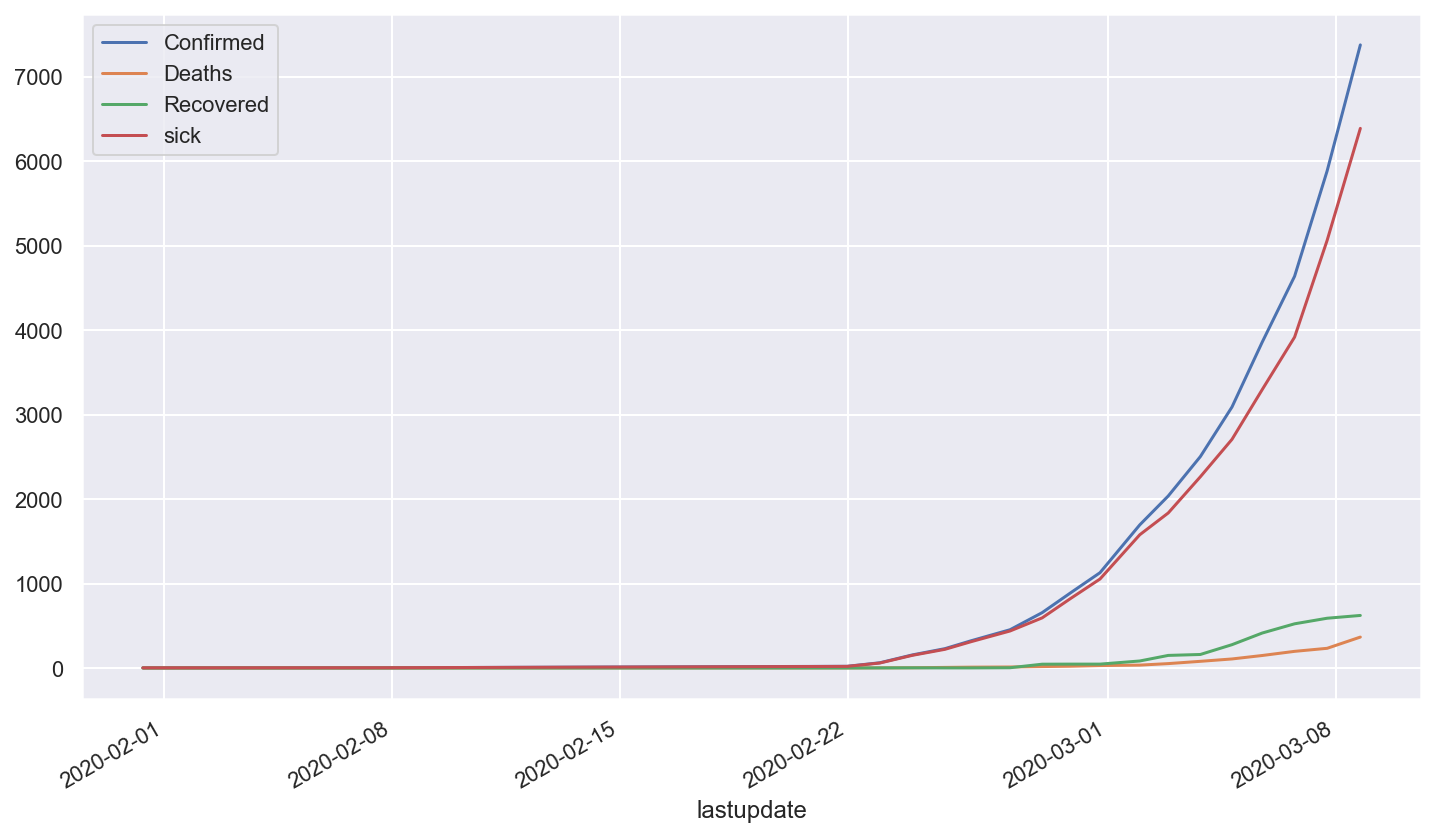

In [14]:
italy = covid_all[covid_all.country == 'Italy'].sort_values(by='lastupdate')
italy.plot.line(x='lastupdate', y=['Confirmed', 'Deaths', 'Recovered', 'sick'])

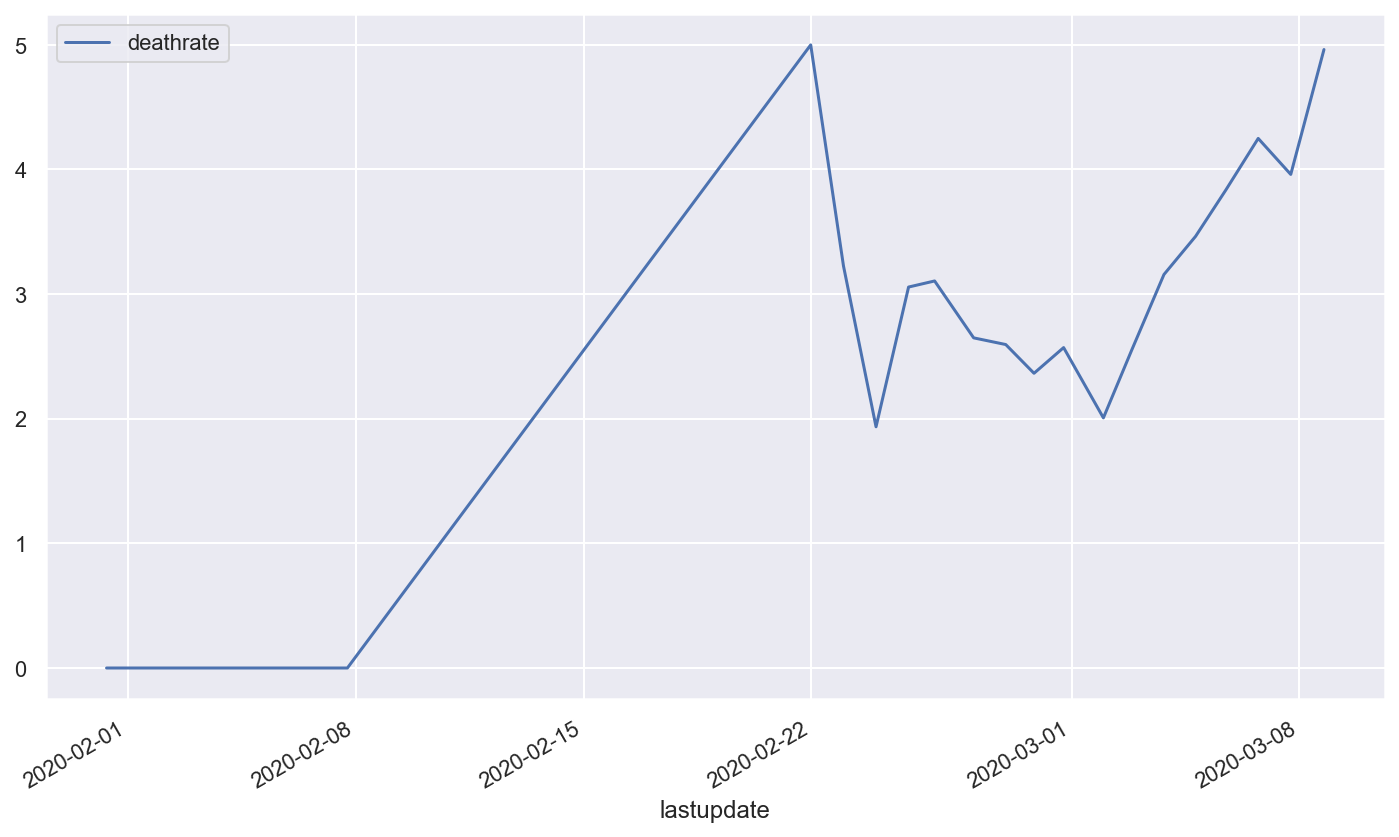

In [15]:
italy.plot.line(x='lastupdate', y='deathrate')

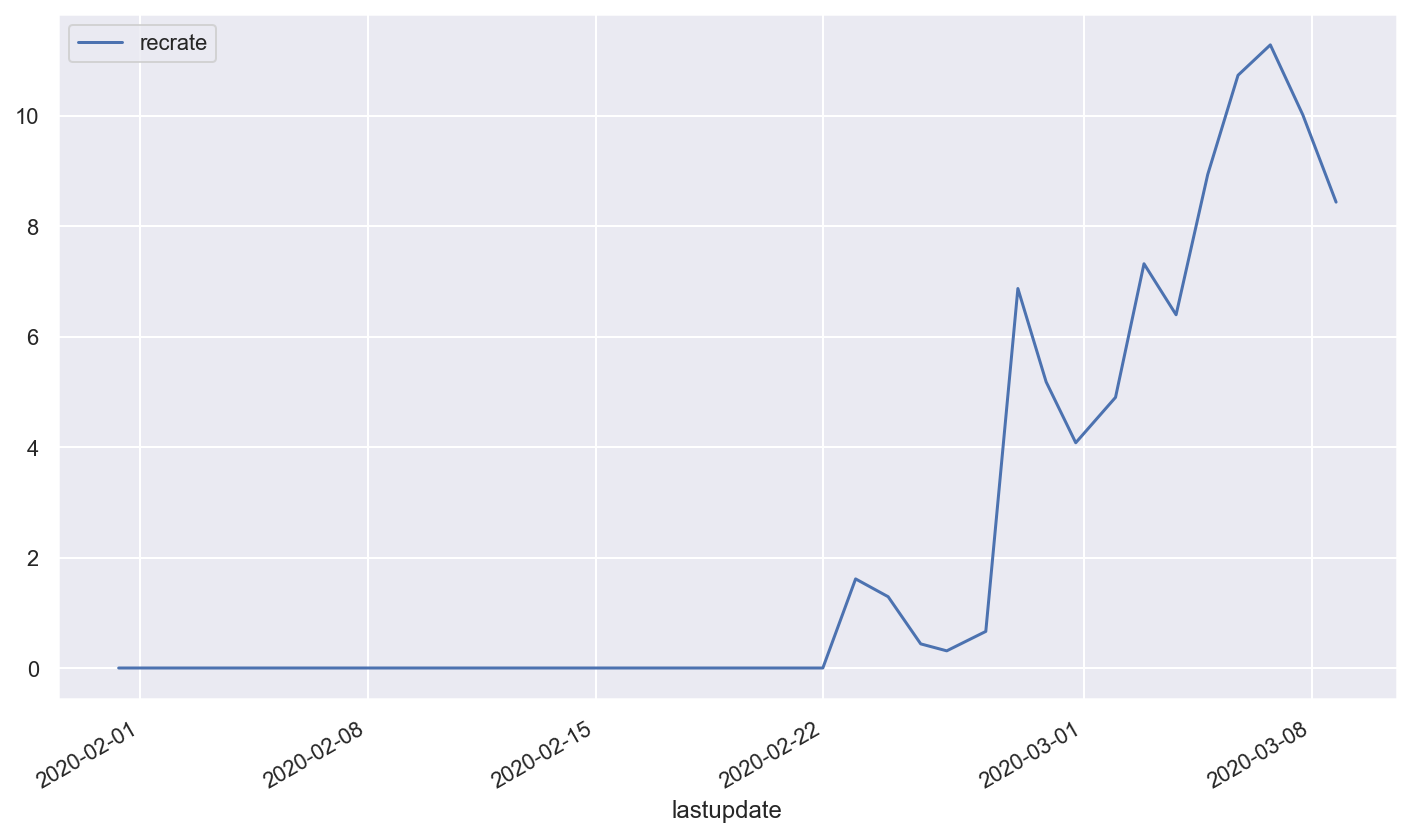

In [22]:
italy.plot.line(x='lastupdate', y='recrate')

## outside china

In [16]:
outside_ch = covid[covid.country != 'Mainland China']
outside_ch

SNo       time                                 state      country  \
3993  3994 2020-03-08                                   NaN        Italy   
3994  3995 2020-03-08                                   NaN  South Korea   
3995  3996 2020-03-08                                   NaN         Iran   
3999  4000 2020-03-08                                   NaN       France   
4000  4001 2020-03-08                                   NaN      Germany   
...    ...        ...                                   ...          ...   
4242  4243 2020-03-08                    Northern Territory    Australia   
4243  4244 2020-03-08  Lackland, TX (From Diamond Princess)           US   
4244  4245 2020-03-08                 Montgomery County, TX           US   
4245  4246 2020-03-08     Omaha, NE (From Diamond Princess)           US   
4246  4247 2020-03-08    Travis, CA (From Diamond Princess)           US   

              lastupdate  Confirmed  Deaths  Recovered    sick  deathrate  \
3993 2020-03-08 18:03:04     7375.0   366.0      622.0  6387.0   4.962712   
3994 2020-03-08 12:53:03     7314.0    50.0      118.0  7146.0   0.683620   
3995 2020-03-08 11:03:30     6566.0   194.0     2134.0  4238.0   2.954615   
3999 2020-03-08 18:03:04     1126.0    19.0       12.0  1095.0   1.687389   
4000 2020-03-08 21:03:03     1040.0     0.0       18.0  1022.0   0.000000   
...                  ...        ...     ...        ...     ...        ...   
4242 2020-03-06 04:33:03        0.0     0.0        0.0     0.0        NaN   
4243 2020-02-24 23:33:02        0.0     0.0        0.0     0.0        NaN   
4244 2020-03-07 19:53:02        0.0     0.0        0.0     0.0        NaN   
4245 2020-02-24 23:33:02        0.0     0.0        0.0     0.0        NaN   
4246 2020-02-24 23:33:02        0.0     0.0        0.0     0.0        NaN   

        recrate  
3993   8.433898  
3994   1.613344  
3995  32.500761  
3999   1.065719  
4000   1.730769  
...         ...  
4242        NaN  
4243        NaN  
4244        NaN  
4245        NaN  
4246        NaN  

[224 rows x 11 columns]

In [17]:
outside_ch.pivot_table(index='country', values=['Deaths', 'Confirmed', 'sick', 'Recovered'], aggfunc=np.sum).sort_values(by='Deaths', ascending=False).head(20)

Confirmed  Deaths  Recovered    sick
country                                          
Italy           7375.0   366.0      622.0  6387.0
Iran            6566.0   194.0     2134.0  4238.0
South Korea     7314.0    50.0      118.0  7146.0
US               537.0    21.0        8.0   508.0
France          1126.0    19.0       12.0  1095.0
Spain            673.0    17.0       30.0   626.0
Iraq              60.0     6.0        0.0    54.0
Japan            502.0     6.0       76.0   420.0
Others           696.0     6.0       40.0   650.0
Australia         76.0     4.0       21.0    51.0
Hong Kong        114.0     3.0       58.0    53.0
UK               273.0     3.0       18.0   252.0
Netherlands      265.0     3.0        0.0   262.0
Switzerland      337.0     2.0        3.0   332.0
Philippines       10.0     1.0        1.0     8.0
Egypt             49.0     1.0        1.0    47.0
Taiwan            45.0     1.0       13.0    31.0
Thailand          50.0     1.0       31.0    18.0
Argentina         12.0     1.0        0.0    11.0
San Marino        36.0     1.0        0.0    35.0

In [18]:
covid_all['inchina'] = covid_all.country == 'Mainland China'

In [19]:
covid_all = covid_all.sort_values('lastupdate')

In [28]:
covid_all_inchina = covid_all[covid_all.inchina == False].dropna().pivot_table(index='lastupdate', values=['Deaths', 'Recovered', 'sick', 'Confirmed'], aggfunc=np.sum)
covid_all_inchina

Confirmed  Deaths  Recovered  sick
lastupdate                                             
2020-01-22 17:00:00        3.0     0.0        0.0   3.0
2020-01-23 17:00:00        6.0     0.0        0.0   6.0
2020-01-24 17:00:00        9.0     0.0        0.0   9.0
2020-01-25 17:00:00       12.0     0.0        0.0  12.0
2020-01-26 16:00:00       23.0     0.0        0.0  23.0
...                        ...     ...        ...   ...
2020-03-08 21:23:03       44.0     0.0        1.0  43.0
2020-03-08 21:33:02       30.0     0.0        3.0  27.0
2020-03-08 21:43:03       55.0     1.0        0.0  54.0
2020-03-08 21:53:03        1.0     0.0        0.0   1.0
2020-03-08 21:53:04        5.0     0.0        0.0   5.0

[294 rows x 4 columns]

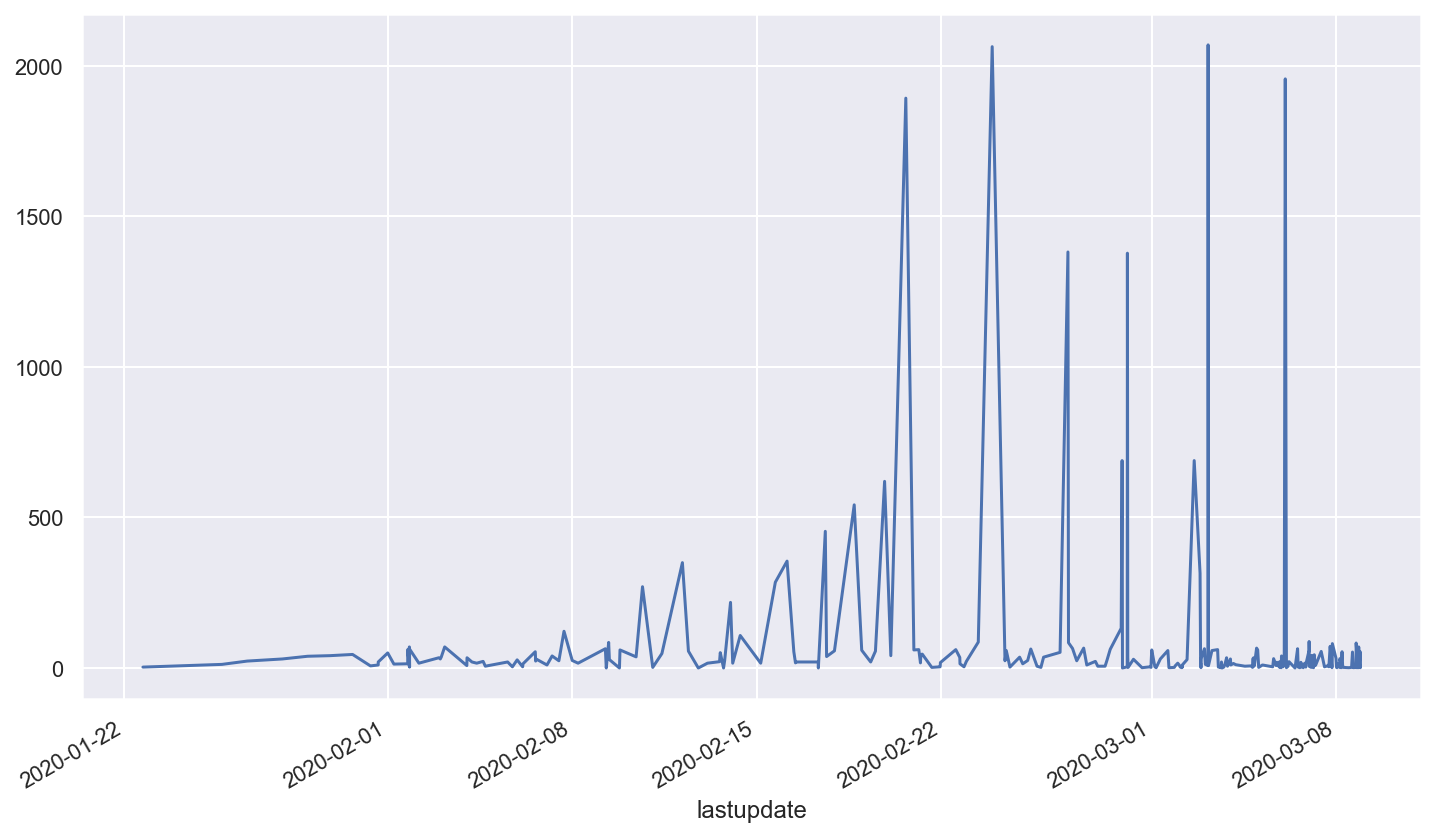

In [29]:
covid_all_inchina.dropna().sick.plot.line()